<a href="https://colab.research.google.com/github/manuprasad-cybera/lending_club/blob/main/load_study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files


uploaded = files.upload()

Saving loan.csv to loan (1).csv


**Loading the Data**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

df = pd.read_csv(io.BytesIO(uploaded['loan (1).csv']))
df.head()


<ipython-input-26-b17470b1642f>:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['loan (1).csv']))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
df.shape

(39717, 111)

**Data cleaning**

In [28]:
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [29]:
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
tax_liens,39
tot_hi_cred_lim,39717
total_bal_ex_mort,39717
total_bc_limit,39717


**Removing the column with null values**


In [30]:
df.dropna(axis=1,how='all',inplace=True)

In [31]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Removing the single-valued columns**


*   first lets find out which column has single valued
*   remove them after that




In [ ]:
sngl_vl_clm = [col for col in df.columns if df[col].nunique() == 1]

print(sngl_vl_clm)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [32]:
df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis=1,inplace=True)

In [33]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


**Deleting the columns in the result above that contain irrelevant or useless data**

In [34]:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [35]:
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [ ]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


In [36]:
df.shape

(39717, 22)

In [37]:
print(df.columns)

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')


**Removing the records which are current ruunig loan status so that we can find the fully paid or charged off records**

In [38]:
df = df[df.loan_status != 'Current']
print(df)

       loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0           5000           4975.0   36 months   10.65%       162.87     B   
1           2500           2500.0   60 months   15.27%        59.83     C   
2           2400           2400.0   36 months   15.96%        84.33     C   
3          10000          10000.0   36 months   13.49%       339.31     C   
5           5000           5000.0   36 months    7.90%       156.46     A   
...          ...              ...         ...      ...          ...   ...   
39712       2500           1075.0   36 months    8.07%        78.42     A   
39713       8500            875.0   36 months   10.28%       275.38     C   
39714       5000           1325.0   36 months    8.07%       156.84     A   
39715       5000            650.0   36 months    7.43%       155.38     A   
39716       7500            800.0   36 months   13.75%       255.43     E   

      sub_grade emp_length home_ownership  annual_inc  ...  loan_status  \


In [39]:
df.loan_status.value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627


**Checking the column with missing values**

In [40]:
(df.isna().sum()/df.shape[0])*100

,0
loan_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_length,2.677761
home_ownership,0.000000
annual_inc,0.000000


 *Lets check what datatype this column's has*

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line      38

lets find the highest frequnecy value to replace the missing values

In [42]:
print(df.emp_length.value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


since 10+ year is the highest  value we can use this to fill the missing value

In [43]:
df.emp_length.fillna('10+ years',inplace=True)

lets check is there any null or NAN's in "emp_length"

In [44]:
df.emp_length.isnull().sum()  #no missing value

0

In [48]:
df.pub_rec_bankruptcies.value_counts()

,count
pub_rec_bankruptcies,
0.0,36189
1.0,1636
2.0,5


In [49]:
df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [50]:
df.pub_rec_bankruptcies.isnull().sum()  #no missing value

0

lets check if there any missing value is "revol_util" if there is any missing value then we can drop it

In [45]:
df.dropna(axis=0,subset=['revol_util'],inplace=True)

In [46]:
df.revol_util.isnull().sum()  #no missing value

0

In [51]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


we need standardize the information in this columns

In [52]:
df.int_rate = pd.to_numeric(df.int_rate.str.replace('%',''))  #removing the % sign

In [53]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


In [54]:
df.revol_util = pd.to_numeric(df.revol_util.str.replace('%','')) #removing the % sign

In [55]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0


In [56]:
df.emp_length = df.emp_length.str.extract('(\d+)').astype(int) #removing the years

In [57]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0


In [58]:
df['emp_length'] = df['emp_length'].replace(1, 0)  #replacing the 1 with 0 since emp_length < 1 year


In [59]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0


Lets check for Outliner since The performance of  models and the results that we  get can be greatly impacted by outliers.

<Axes: ylabel='annual_inc'>

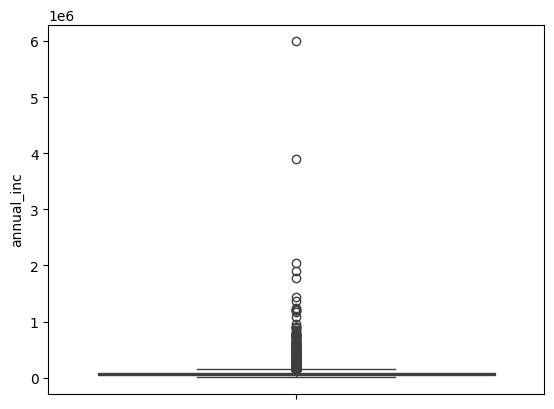

In [ ]:
sns.boxplot(df['annual_inc'])

Since the maximum is 6000k, which is far from the upper fence  we will eliminate the outliers in column annual_inc.

In [ ]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

,annual_inc
0.50,59000.0
0.75,82000.0
0.90,115000.0
0.95,140004.0
0.97,165000.0
0.98,187000.0
0.99,234000.0


In [62]:
per_95_anul_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_anul_inc]

<Axes: ylabel='annual_inc'>

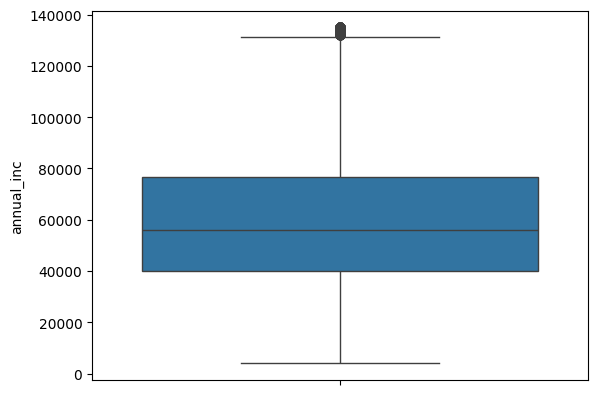

In [63]:
sns.boxplot(df['annual_inc'])  #no outliers

<Axes: ylabel='dti'>

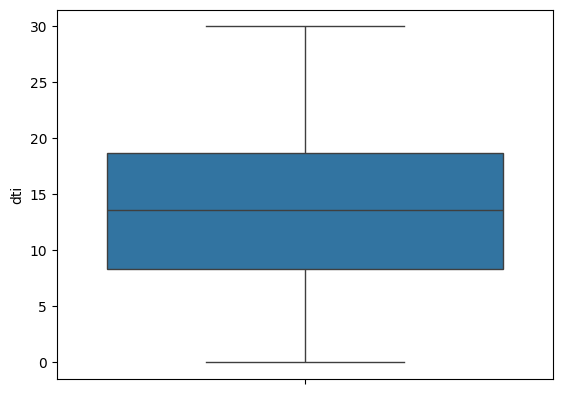

In [64]:
sns.boxplot(df.dti)

There is no outliner so we can move furthur

<Axes: ylabel='loan_amnt'>

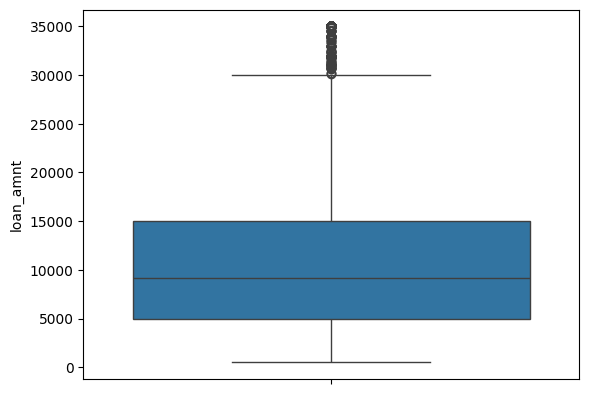

In [65]:
sns.boxplot(df.loan_amnt)

since the upper limit is 30K and max is 35k whicj is much more than upper limit
so it will not have any impact

In [ ]:
df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

,loan_amnt
0.750,15000.0
0.900,20000.0
0.950,25000.0
0.970,25475.0
0.975,28000.0
0.980,30000.0
0.990,35000.0
1.000,35000.0


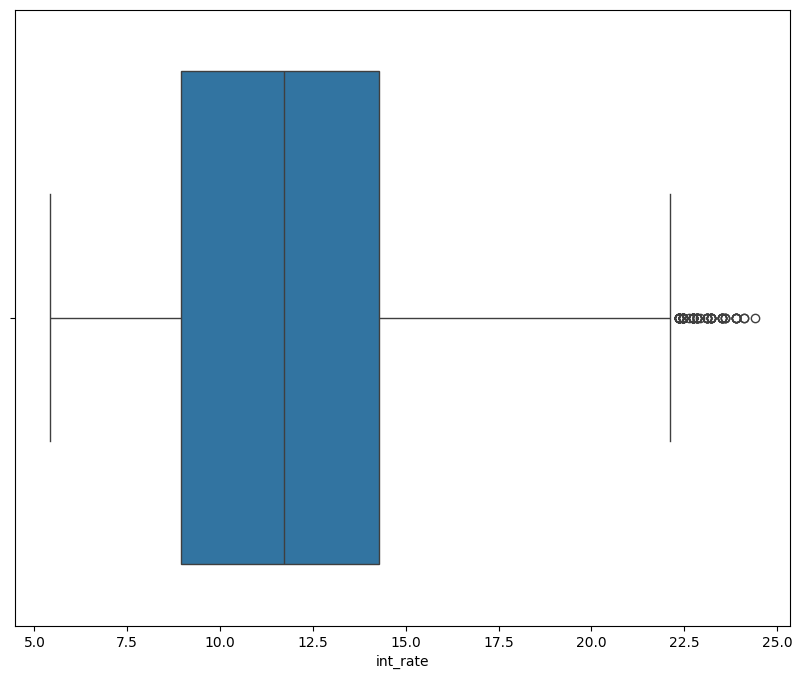

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='int_rate', data=df,ax=ax);

upper limit is 22k and max is 25K so no imact on analysis

loan_status
Fully Paid     30956
Charged Off     5375
Name: count, dtype: int64


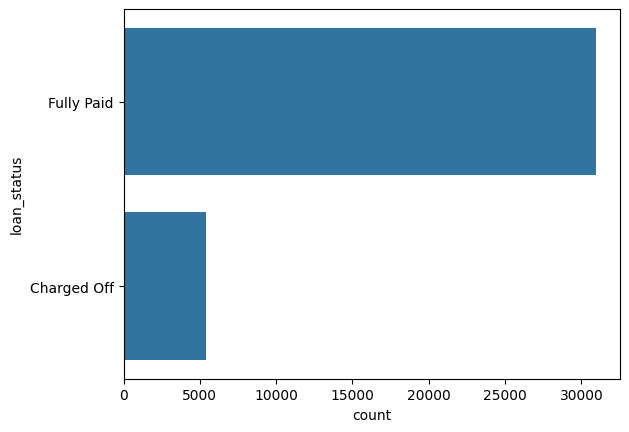

In [79]:
sns.countplot(df.loan_status)
print(df.loan_status.value_counts())

**Obervation** : fully paid is more compared to charged off or defaulted

In [74]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.head()

,sub_grade
0,2
1,4
2,5
3,1
5,4


In [75]:
df.grade.value_counts()

,count
grade,
B,11024
A,9577
C,7418
D,4786
E,2402
F,870
G,254


<Axes: xlabel='grade', ylabel='count'>

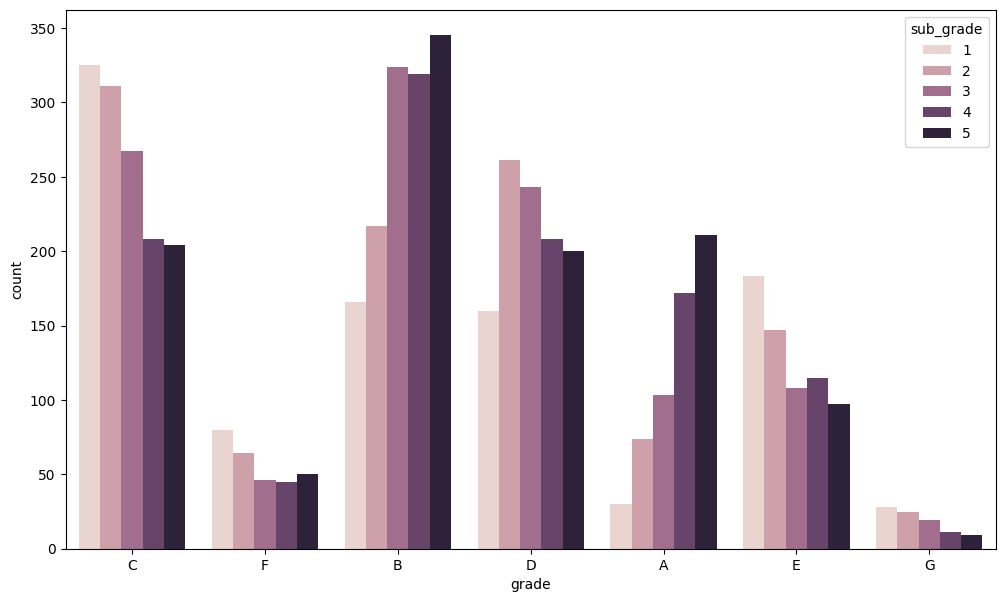

In [76]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(x ='grade', hue='sub_grade',data=df[df.loan_status =='Charged Off'], ax=ax)

**Observation**: The majority of loans are high grade loans, as evidenced by the high percentage of loans with grades of "A" and "B" relative to the rest.

In [ ]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
df.home_ownership.replace(['NONE'], 'OTHER', inplace=True)

In [ ]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

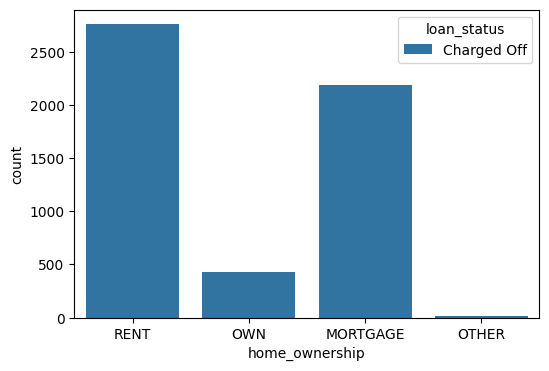

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='home_ownership', hue='loan_status',data=df[df.loan_status =='Charged Off'], ax=ax)

**Obeservation**: Most borrowers are either renters or mortgage holders than proter owners .

loan by issued month and year

<Axes: xlabel='count', ylabel='purpose'>

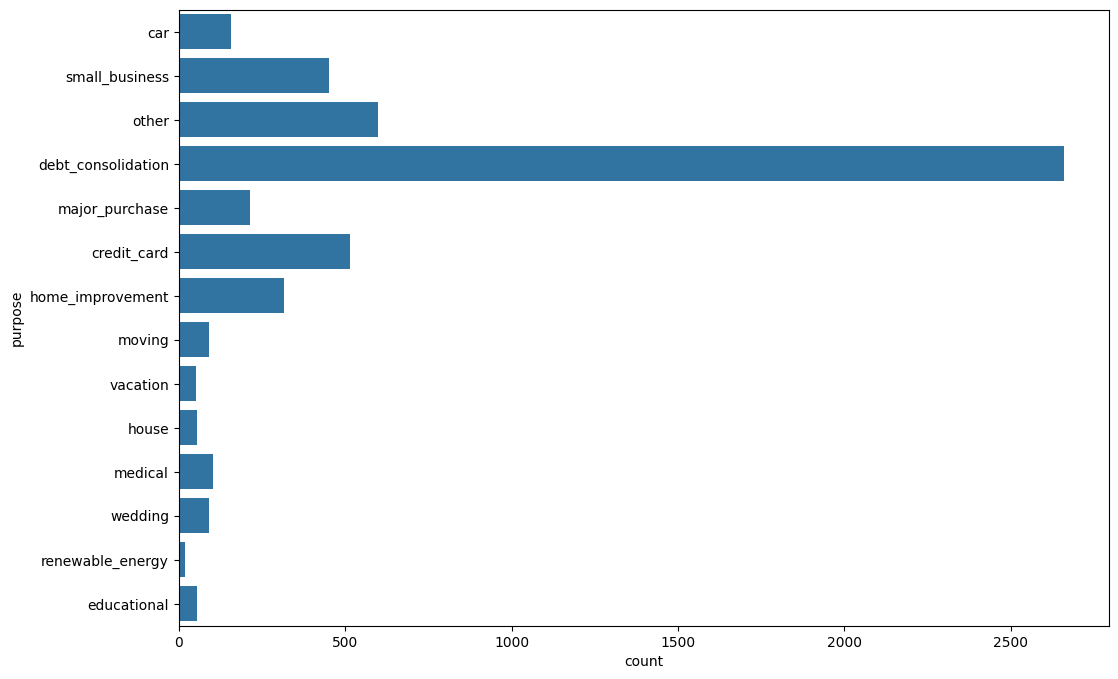

In [87]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'])

**Observation**: Credit card and small busines fallowed by other debt is the main reason for obtaining loans, with a significant portion going toward debt consolidation.

In [ ]:
print(df.issue_d)

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 36606, dtype: object


In [ ]:
print(df.issue_d.value_counts())

issue_d
Dec-11    1967
Nov-11    1959
Oct-11    1809
Sep-11    1790
Aug-11    1700
Jul-11    1649
Jun-11    1616
May-11    1528
Apr-11    1496
Mar-11    1361
Jan-11    1321
Feb-11    1241
Dec-10    1209
Jul-10    1083
Nov-10    1076
Oct-10    1071
Sep-10    1030
Aug-10    1026
Jun-10     982
May-10     886
Apr-10     791
Mar-10     697
Feb-10     591
Nov-09     568
Jan-10     552
Dec-09     552
Oct-09     513
Sep-09     426
Aug-09     391
Jul-09     354
Jun-09     336
May-09     305
Apr-09     278
Mar-09     266
Feb-09     249
Jan-09     226
Mar-08     220
Dec-08     206
Nov-08     179
Feb-08     168
Jan-08     164
Apr-08     146
Oct-08      89
Dec-07      82
Jul-08      80
May-08      69
Aug-08      66
Jun-08      65
Oct-07      46
Nov-07      34
Sep-08      29
Aug-07      28
Jul-07      24
Sep-07      15
Jun-07       1
Name: count, dtype: int64


<Axes: xlabel='issue_d', ylabel='count'>

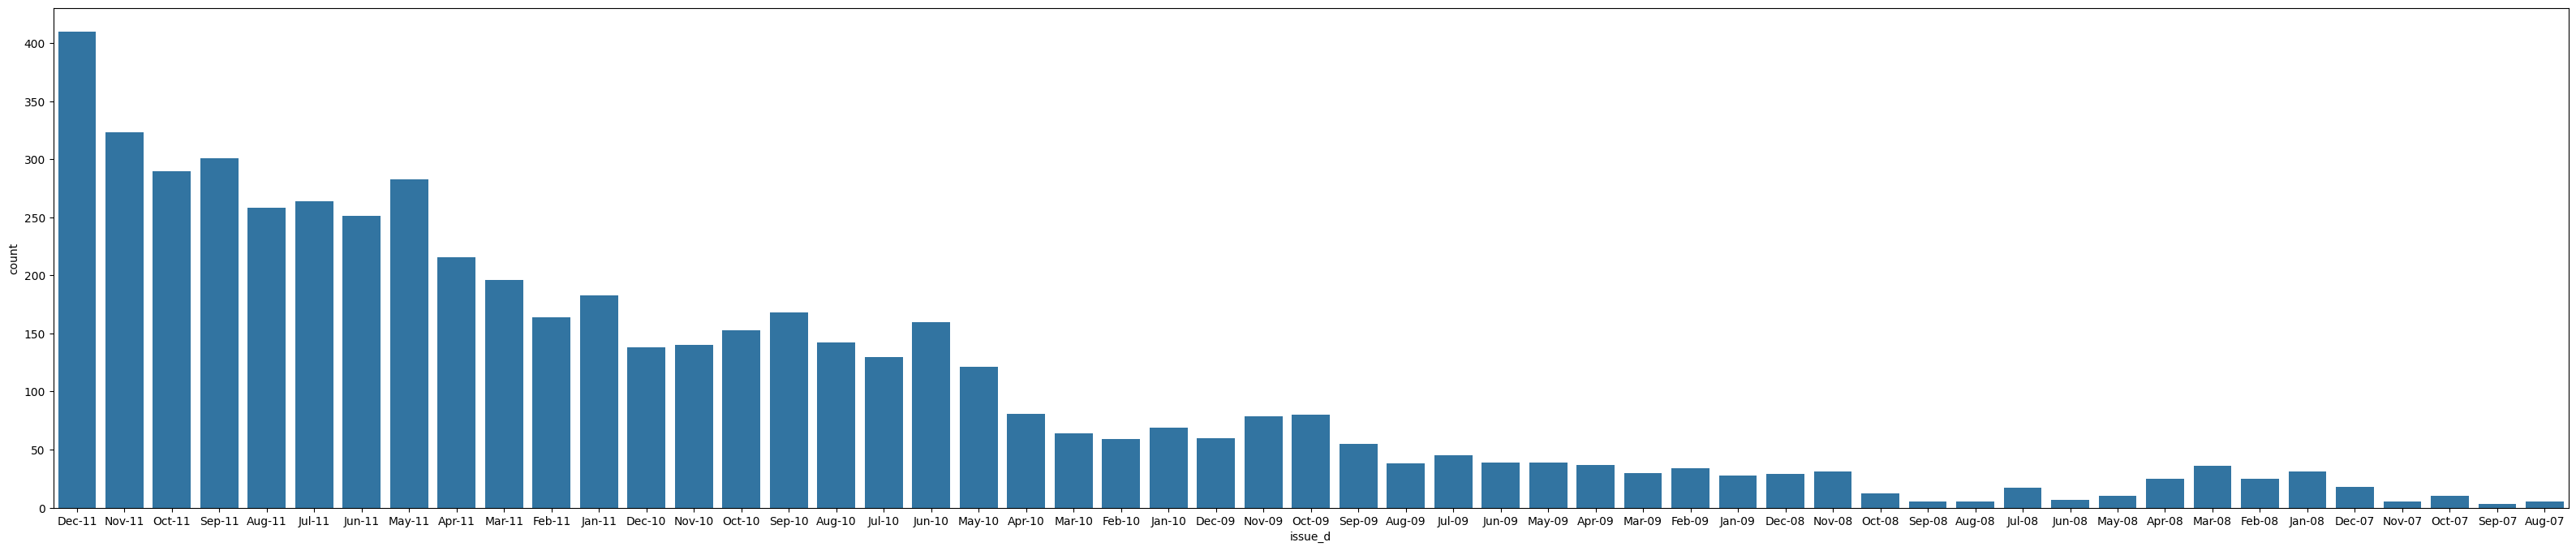

In [ ]:
fig, ax = plt.subplots(figsize = (40,8))
sns.countplot(x ='issue_d', data=df[df.loan_status == 'Charged Off'], ax=ax)

**Observation**:According to above graph maximum number of charged of happend in the year 2011 and that too in December

<Axes: xlabel='annual_inc', ylabel='Count'>

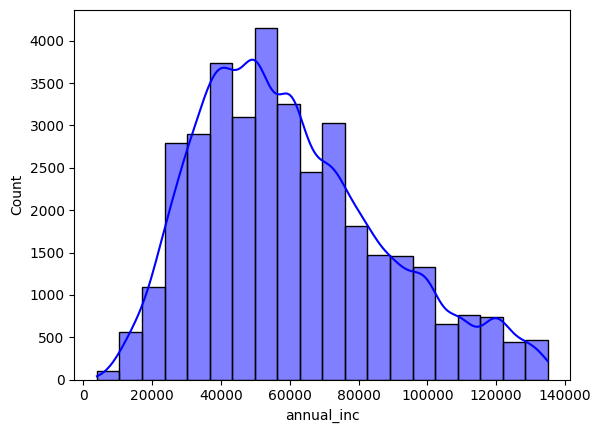

In [82]:
sns.histplot(df.annual_inc, kde=True, color='blue')

**Observation**: The annual income of burrowers is tilted to the left, indicating that their income is generally much lower than that of other burrowers.

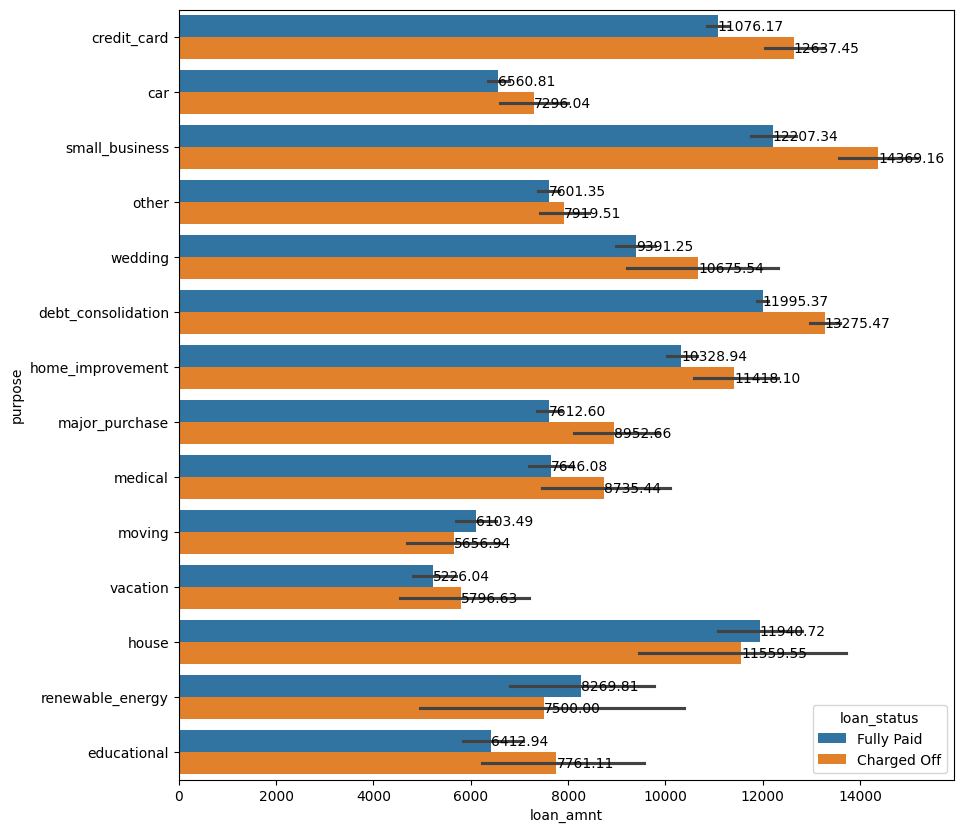

In [ ]:
plt.figure(figsize=(10,10))
barplot =sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status')

# Annotate each bar with its value
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

**Observation**: Credit card and small busines fallowed by other debt is the main reason for obtaining loans, with a significant portion going toward debt consolidation.

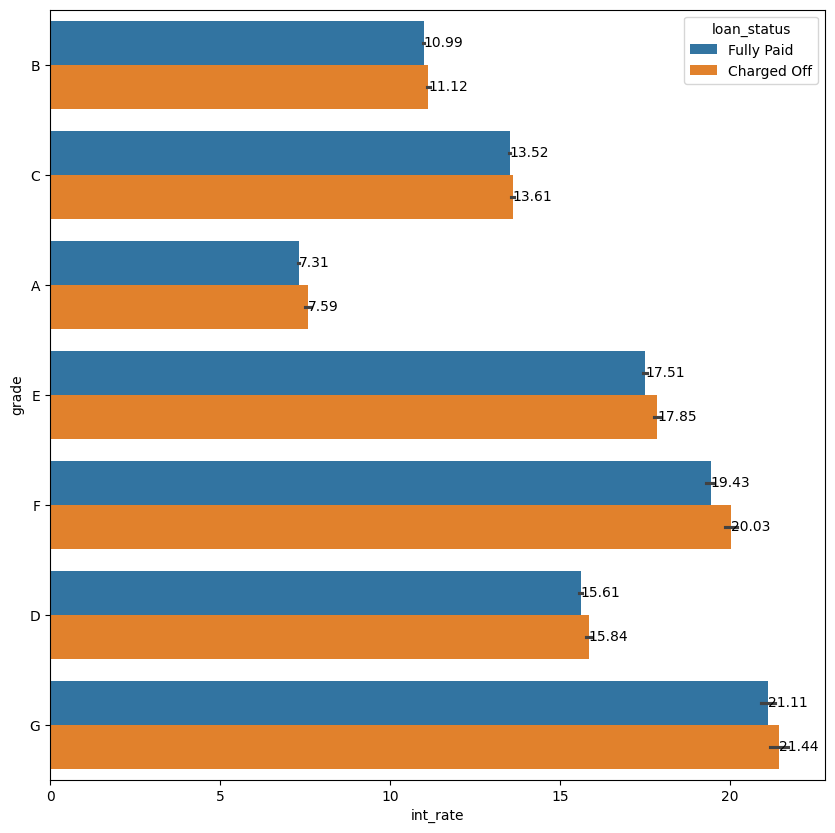

In [ ]:
plt.figure(figsize=(10,10))
barplot = sns.barplot(data =df,x='int_rate', y='grade', hue ='loan_status')

# Annotate each bar with its value
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.show()

<Axes: xlabel='annual_inc', ylabel='Count'>

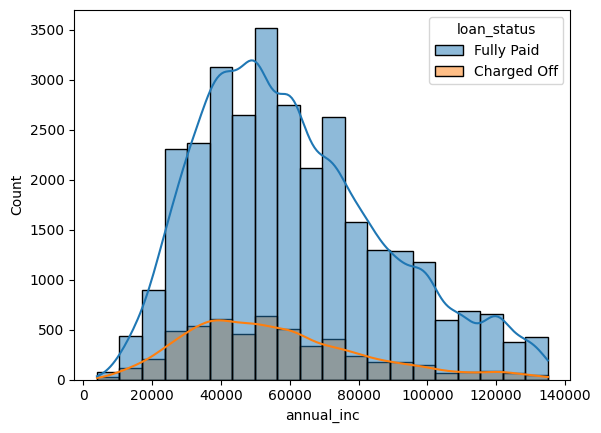

In [100]:
sns.histplot(data=df,x='annual_inc',hue='loan_status',bins=20,kde=True)

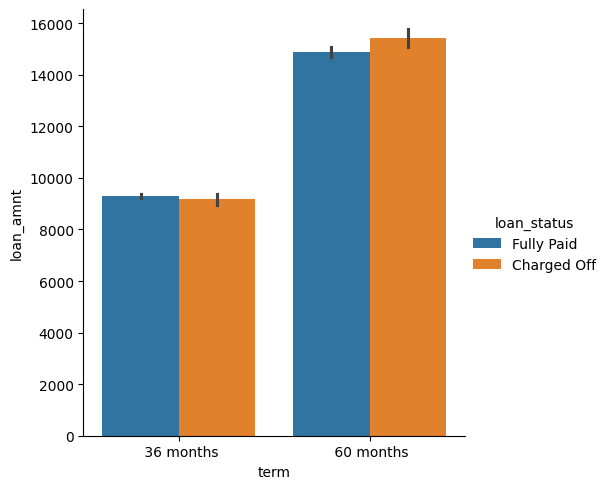

In [ ]:
 sns.catplot(x = 'term', y = 'loan_amnt', data = df,hue = 'loan_status', kind = 'bar')


<Axes: xlabel='int_rate', ylabel='Count'>

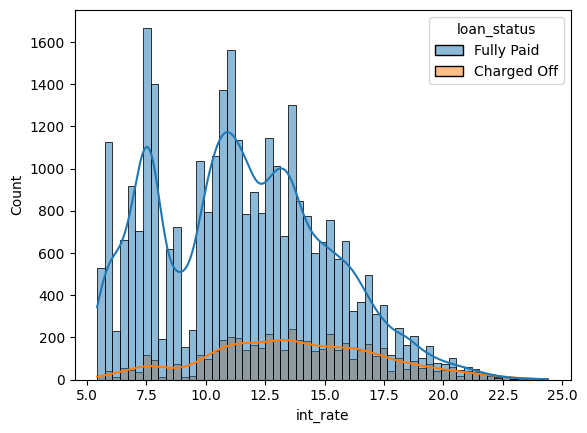

In [97]:
sns.histplot(data=df,x='int_rate',hue='loan_status', kde=True)


<Axes: xlabel='emp_length', ylabel='count'>

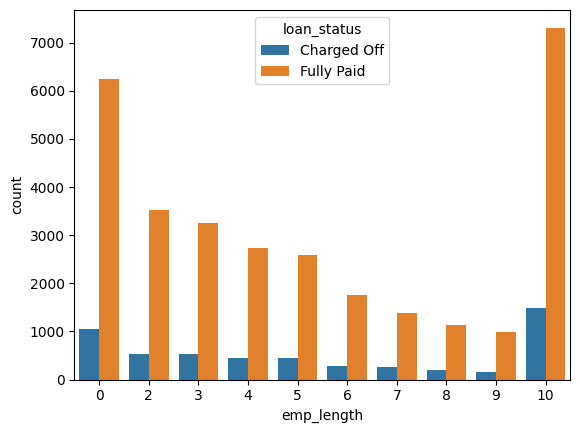

In [92]:
sns.countplot(x='emp_length',hue='loan_status',data=df)

**Final Observations**

*   as per dti with loan status the intrest rate  between 10 -17 have higher chance of load default
*   emaployee with the 10+ year experiance have higher chance of full repayment but also likely to default
*   large amount of loan had high chance of defaulting
*   barrowers with thee less annuel income between 40K to 80K likey to default where as higher annual incle are less likely
*   dept consolidation, small business, house  is having highest number of default and also fully repayment
*   people who own thw property are less likely default
*   deaulting loan is decreased ofter interst rate 17.5 and also increased with increasing intrest








